In [1]:
import cell2fate as c2f
import scanpy as sc
import numpy as np
import os
import matplotlib.pyplot as plt
import scvelo as scv

# Set up output figure settings
plt.rcParams['figure.figsize']=(128,128) #rescale figures, increase sizehere

# Set up scanpy settings
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100, dpi_save=300) #Increase DPI for better resolution figures
#sc.logging.print_versions()

Global seed set to 0


# Read the data

In [2]:
cd /Users/joaoluizsfilho/Library/CloudStorage/Dropbox/Work_Files/Matthias_Lab/Projects/Vivax_human_project/Results/Prospective_Study_1/BM_lonza/scRNAseq/Scanpy_analysis

/Users/joaoluizsfilho/Library/CloudStorage/Dropbox/Work_Files/Matthias_Lab/Projects/Vivax_human_project/Results/Prospective_Study_1/BM_lonza/scRNAseq/Scanpy_analysis


In [ ]:
adata = scv.read('./h5ad_files/Merged_dataset/BM_merged_query_scVelo.h5ad', cache=True) #use the file processed after DPT and prepared for scvelo but before preprocessing

# 1- Extract most variable genes and optionally remove some clusters

In [ ]:
clusters_to_remove = []

In [ ]:
adata = c2f.utils.get_training_data(adata, cells_per_cluster = 10**5, cluster_column = 'SingleR.labels',
                                    remove_clusters = clusters_to_remove,
                                min_shared_counts = 20, n_var_genes= 3000)

In [ ]:
max_modules = c2f.utils.get_max_modules(adata)

# 2- Register the anndata object and initialize the model

In [ ]:
adata

In [ ]:
c2f.Cell2fate_DynamicalModel.setup_anndata(adata, spliced_label='spliced', unspliced_label='unspliced')

In [ ]:
mod = c2f.Cell2fate_DynamicalModel(adata, n_modules = max_modules, Tmax_prior={"mean": 500., "sd": 100.})

In [ ]:
mod.view_anndata_setup()

# 3- Training the model

In [ ]:
max_epochs_scvi = np.min([round((20000 / adata.n_obs) * 400), 400])
max_epochs_scvi

In [ ]:
mod.train(max_epochs=80) #takes days to run that is why I reduced to 3000 genes and determined max epochs

In [3]:
import dill

Plot training history over multiple windows to effectively assess convergence (which is not reached here but it is close.)

In [ ]:
#save the session
dill.dump_session('BM_Lonza_merged_whole_dataset_cell2fate.db')

In [4]:
#load the session
dill.load_session('./4_cell2fate/BM_Lonza_merged_whole_dataset_cell2fate.db')

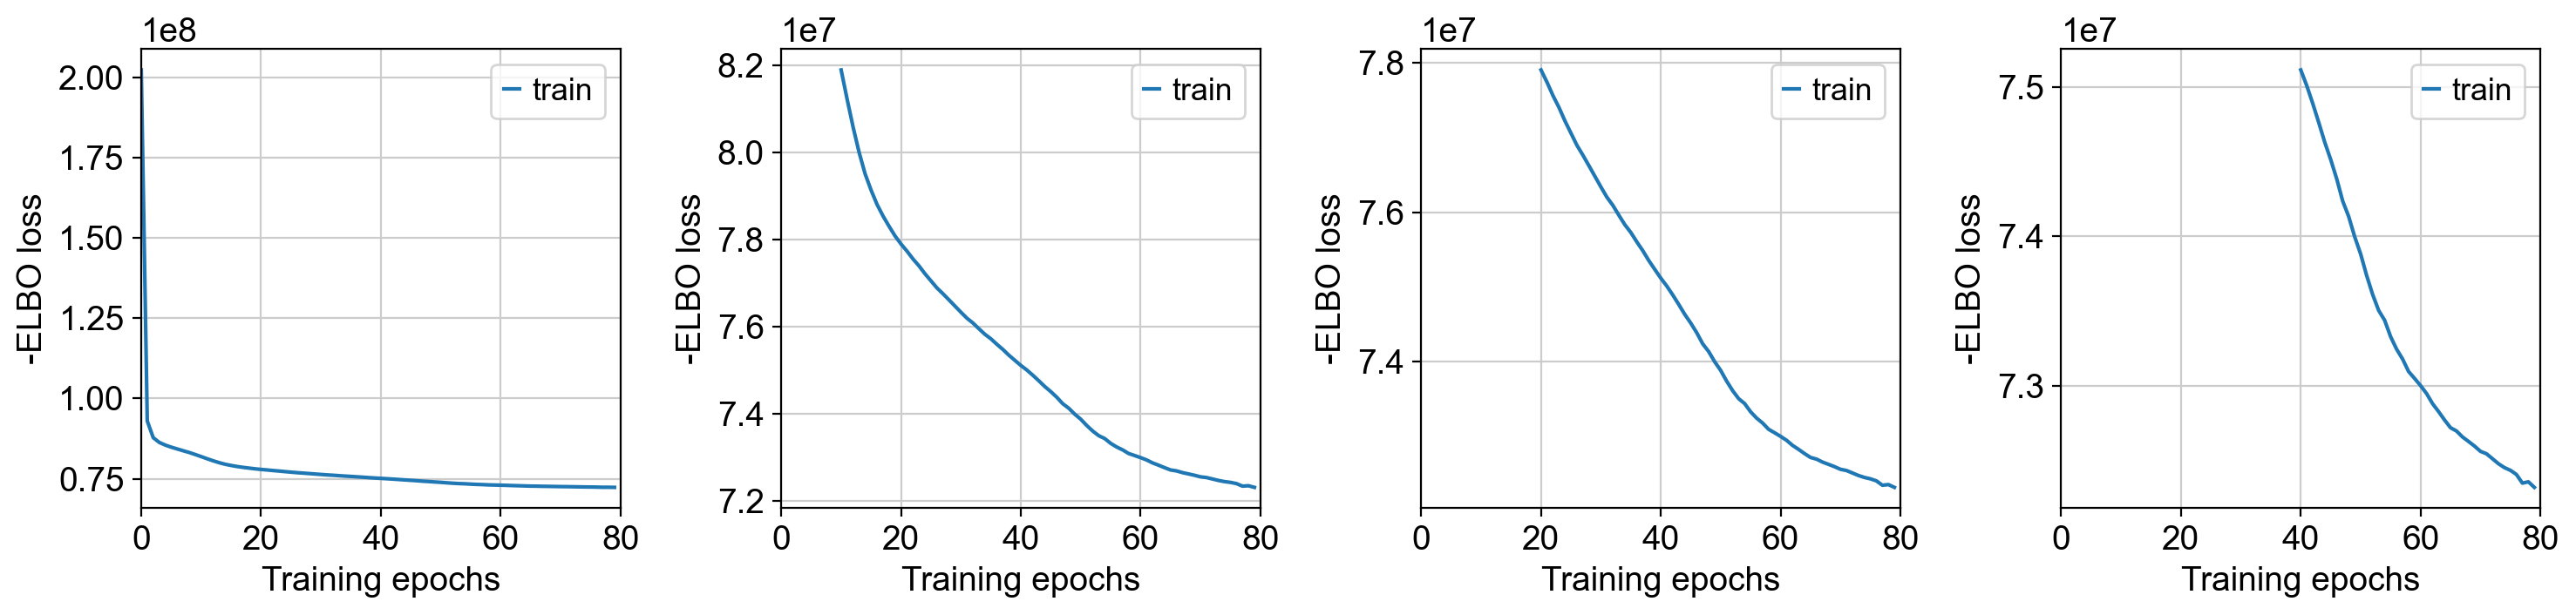

In [5]:
mod.view_history()

Export the model posterior to the anndata object

In [6]:
sample_kwarg = {"batch_size" : 100, "use_gpu" : False, 'return_samples': True}

#"num_samples": 20, 

In [ ]:
adata = mod.export_posterior(adata, sample_kwargs=sample_kwarg)

Sampling local variables, batch:   2%|▍                           | 16/1000 [1:44:46<146:51:37, 537.29s/it]